## Corner Detection Algorithm

- Harris Corner Detection
- Shi-Tomasi Corner Detection

In [9]:
import cv2 
import numpy as np  

import matplotlib.pyplot as plt
%matplotlib inline

## Harris Corner Detection

published in 1988 by Chris Harris and Mike Stephens
by looking for significant changes in all directions

Flat regions will have no chenges in all directions
Edge will not have major changes






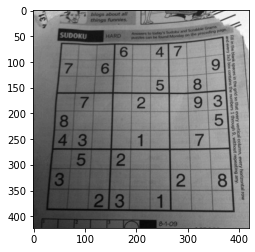

In [12]:
sudoku_bgr = cv2.imread('images/sudoku-original.jpg')
sudoku = cv2.cvtColor(sudoku_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(sudoku, cmap='gray')

**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

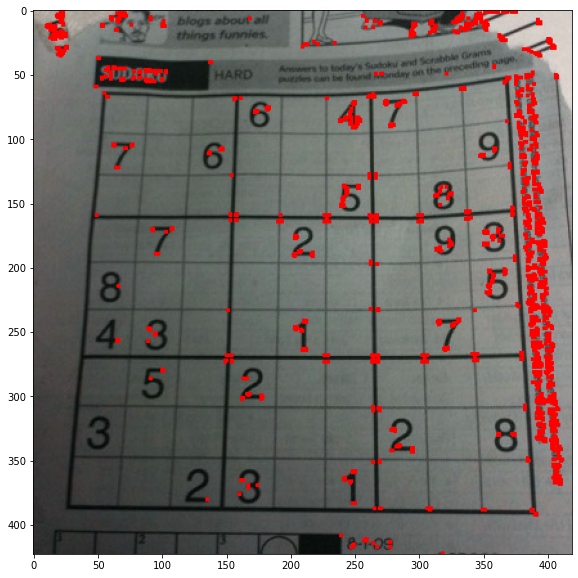

In [14]:
# Convert Gray Scale Image to Float Values
gray = np.float32(sudoku)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
sudoku_bgr[dst>0.01*dst.max()]=[255,0,0]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(sudoku_bgr)


## Shi-Tomasi Corner Detection
-----

## Shi-Tomasi Corner Detector & Good Features to Track Paper

[Link to Paper from Video](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

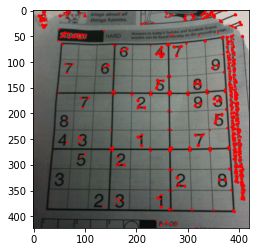

In [17]:
corners = cv2.goodFeaturesToTrack(sudoku,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(sudoku_bgr,(x,y),3,255,-1)

plt.imshow(sudoku_bgr)